# Introduction

In this project, you will build a neural network of your own design to evaluate the MNIST dataset.

Some of the benchmark results on MNIST include can be found [on Yann LeCun's page](https://webcache.googleusercontent.com/search?q=cache:stAVPik6onEJ:yann.lecun.com/exdb/mnist) and include:

88% [Lecun et al., 1998](https://hal.science/hal-03926082/document)

95.3% [Lecun et al., 1998](https://hal.science/hal-03926082v1/document)

99.65% [Ciresan et al., 2011](http://people.idsia.ch/~juergen/ijcai2011.pdf)


MNIST is a great dataset for sanity checking your models, since the accuracy levels achieved by large convolutional neural networks and small linear models are both quite high. This makes it important to be familiar with the data.

## Installation

In [1]:
# Update the PATH to include the user installation directory. 
import os
os.environ['PATH'] = f"{os.environ['PATH']}:/root/.local/bin"

# Restart the Kernel before you move on to the next step.

#### Important: Restart the Kernel before you move on to the next step.

In [1]:
# Install requirements
!python -m pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 37.1 MB 862 kB/s eta 0:00:01
     |████████████████████████████████| 19.3 MB 53.4 MB/s eta 0:00:01
     |████████████████████████████████| 21.0 MB 64.7 MB/s eta 0:00:01
     |████████████████████████████████| 76 kB 6.0 MB/s  eta 0:00:01
     |████████████████████████████████| 123 kB 70.3 MB/s eta 0:00:01
     |████████████████████████████████| 297 kB 71.0 MB/s eta 0:00:01
     |████████████████████████████████| 11.3 MB 62.7 MB/s eta 0:00:01
     |████████████████████████████████| 292 kB 62.3 MB/s eta 0:00:01
     |████████████████████████████████| 109 kB 68.5 MB/s eta 0:00:01
     |████████████████████████████████| 214 kB 74.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 58.0 MB/s eta 0:00:01
     |████████████████████████████████| 98 kB 10.8 MB/s eta 0:00:01
     |████████████████████████████████| 121 kB 68.2 MB/s eta 0:00:01


     |████████████████████████████████| 93 kB 2.3 MB/s  eta 0:00:01
  Created wheel for bokeh: filename=bokeh-2.1.1-py3-none-any.whl size=9257186 sha256=512c2f51995855b83c3f5dfeed53376c5cdf0ffb1651493b09c22dc82813aa00
  Stored in directory: /root/.cache/pip/wheels/f7/55/ff/f3d7554e69382d31cf7ad857cf518af9b923134fca7d925187
Successfully built bokeh
ERROR: jupyter-console 6.6.3 has requirement ipykernel>=6.14, but you'll have ipykernel 4.10.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-client>=7.0.0, but you'll have jupyter-client 6.0.0 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement jupyter-core!=5.0.*,>=4.12, but you'll have jupyter-core 4.6.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement prompt-toolkit>=3.0.30, but you'll have prompt-toolkit 3.0.3 which is incompatible.
ERROR: jupyter-console 6.6.3 has requirement traitlets>=5.4, but you'll have traitlets 4.3.3 which is incompatible.
  Consider adding this direc

## Imports

In [2]:
## This cell contains the essential imports you will need – DO NOT CHANGE THE CONTENTS! ##
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

## Load the Dataset

Specify your transforms as a list if you intend to .
The transforms module is already loaded as `transforms`.

MNIST is fortunately included in the torchvision module.
Then, you can create your dataset using the `MNIST` object from `torchvision.datasets` ([the documentation is available here](https://pytorch.org/vision/stable/datasets.html#mnist)).
Make sure to specify `download=True`! 

Once your dataset is created, you'll also need to define a `DataLoader` from the `torch.utils.data` module for both the train and the test set.

In [3]:
# Doing our required importations for the data loader of our dataset first,
from torch.utils.data import DataLoader
# Define transforms
def create_transform():
    """"
    Here, we'll define our transformation, using torch.nn.Sequential
    It will return a PyTorch transformation object.
    """
    return torch.nn.Sequential(torch.nn.ToTensor)

# Create training set and define training dataloader
# I'll name my training set, 'train_data'
train_data = torchvision.datasets.MNIST(download=True, root='data', train=True, transform=create_transform)
train_loader = DataLoader(train_data, shuffle=True, batch_size=64)

# Create test set and define test dataloader
transform = create_transform
# Now I'll personally define my test set as test_data
test_data = torchvision.datasets.MNIST(root='data', download=True, train=False, transform=create_transform)
test_loader = Dataloader(dataset=test_data, batch_size=64, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden




ImportError: FloatProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

## Justify your preprocessing

In your own words, why did you choose the transforms you chose? If you didn't use any preprocessing steps, why not?

**DOUBLE CLICK THIS CELL TO MODIFY**

## Explore the Dataset
Using matplotlib, numpy, and torch, explore the dimensions of your data.

You can view images using the `show5` function defined below – it takes a data loader as an argument.
Remember that normalized images will look really weird to you! You may want to try changing your transforms to view images.
Typically using no transforms other than `toTensor()` works well for viewing – but not as well for training your network.
If `show5` doesn't work, go back and check your code for creating your data loaders and your training/test sets.

In [5]:
## This cell contains a function for showing 5 images from a dataloader – DO NOT CHANGE THE CONTENTS! ##
def show5(img_loader):
    dataiter = iter(img_loader)
    
    batch = next(dataiter)
    labels = batch[1][0:5]
    images = batch[0][0:5]
    for i in range(5):
        print(int(labels[i].detach()))
    
        image = images[i].numpy()
        plt.imshow(image.T.squeeze().T)
        plt.show()

In [6]:
# Explore data
print("Size of the training set:", len(train_data))
print("Size of the test set:", len(test_data))
print("Shape of training set:", train_data[0][0].shape)
print("Shape of test set:", test_data[0][0].shape)
show5(train_loader)

NameError: name 'train_data' is not defined

## Build your Neural Network
Using the layers in `torch.nn` (which has been imported as `nn`) and the `torch.nn.functional` module (imported as `F`), construct a neural network based on the parameters of the dataset.
Use any architecture you like. 

*Note*: If you did not flatten your tensors in your transforms or as part of your preprocessing and you are using only `Linear` layers, make sure to use the `Flatten` layer in your network!

In [7]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.flatten = nn.Flatten()
        # Now representing our linear layer in the neural network with two arguments the input and output size,
        self.fc1 = nn.Linear(1024, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.flatten(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

Specify a loss function and an optimizer, and instantiate the model.

If you use a less common loss function, please note why you chose that loss function in a comment.

In [8]:
model = Net()

# loss function
criterion = nn.CrossEntropyLoss()

# optimizer
optimizer = optim.SGD(model.parameters(), lr=eta, momentum=0.9)

NameError: name 'eta' is not defined

## Running your Neural Network
Use whatever method you like to train your neural network, and ensure you record the average loss at each epoch. 
Don't forget to use `torch.device()` and the `.to()` method for both your model and your data if you are using GPU!

If you want to print your loss **during** each epoch, you can use the `enumerate` function and print the loss after a set number of batches. 250 batches works well for most people!

In [9]:
# Defining the device to use (cuda if available, cpu otherwise)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the chosen device
model.to(device)

# Set the model to training mode
model.train()

# Define the number of batches to print the loss
print_loss_every = 250

# Lists to store the loss values
train_loss_values = []

# Define the number of epochs
num_epochs = 20

# Training loop
for epoch in range(num_epochs):
    running_loss = 0.0

    for batch_idx, data in enumerate(train_loader):
        # Extract images and labels from the data
        images, labels = data[0].to(device), data[1].to(device)  # Assuming data is a tuple

        # Clear gradients before each pass
        optimizer.zero_grad()

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        # Update running loss
        running_loss += loss.item()

        # Print loss every few batches
        if (batch_idx + 1) % print_loss_every == 0:
            avg_loss = running_loss / print_loss_every
            print(f"Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx+1}/{len(train_loader)}], Loss: {avg_loss:.4f}")
            train_loss_values.append(avg_loss)
            running_loss = 0.0


NameError: name 'train_loader' is not defined

Plot the training loss (and validation loss/accuracy, if recorded).

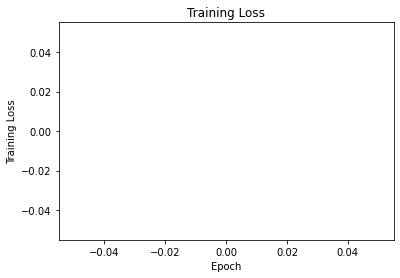

In [10]:
# Plotting the training loss now,
plt.plot(train_loss_values)
plt.xlabel("Epoch")
plt.ylabel("Training Loss")
plt.title("Training Loss")
plt.show()

## Testing your model
Using the previously created `DataLoader` for the test set, compute the percentage of correct predictions using the highest probability prediction. 

If your accuracy is over 90%, great work, but see if you can push a bit further! 
If your accuracy is under 90%, you'll need to make improvements.
Go back and check your model architecture, loss function, and optimizer to make sure they're appropriate for an image classification task.

In [11]:
# Let's initialize counters for tracking accuracy
correct_predictions = 0
total_predictions = 0

# Setting the model to evaluation mode (disable dropout etc.)
model.eval()

# Looping through the test data loader
for labels, images in test_loader:  # Switched order of labels and images
    # Move data to the appropriate device (GPU/CPU)
    images = images.to(device)
    labels = labels.to(device)

    # Make predictions using the model
    outputs = model(images)

    # Get the predicted class with the highest probability
    _, predicted = torch.max(outputs.data, 1)

    # Update correct predictions based on matches with labels
    correct_predictions += (predicted == labels).sum().item()

    # Update total predictions based on batch size
    total_predictions += labels.size(0)

# Calculate final accuracy as percentage
accuracy = (correct_predictions / total_predictions) * 100

print(f"Accuracy: {accuracy:.2f}%")


NameError: name 'test_loader' is not defined

## Improving your model

Once your model is done training, try tweaking your hyperparameters and training again below to improve your accuracy on the test set!

In [12]:
# Hyperparameters
learning_rate = eta
num_epochs = 30
batch_size = 64
num_workers = 4

# Model definition and device placement
model = Net().to(device)

# Loss function (consider alternatives)
criterion = nn.CrossEntropyLoss()

# Optimizer with learning rate control
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Data loaders with efficiency tweaks
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size, num_workers=num_workers, pin_memory=True)
test_loader = DataLoader(test_data, shuffle=False, batch_size=batch_size, num_workers=num_workers, pin_memory=True)

# Training loop
for epoch in range(num_epochs):
    epoch_loss = 0.0

    for batch_idx, (data, target) in enumerate(train_loader):  # Renamed for clarity
        # Move data to device
        data, target = data.to(device), target.to(device)

        # Zero gradients
        optimizer.zero_grad()

        # Forward pass
        output = model(data)
        loss = criterion(output, target)

        # Backward pass and update
        loss.backward()
        optimizer.step()

        # Track loss
        epoch_loss += loss.item()

        # Print loss (optional)
        if (batch_idx + 1) % print_loss_every == 0:
            avg_loss = epoch_loss / print_loss_every
            print(f"Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx+1}/{len(train_loader)}], Loss: {avg_loss:.4f}")
            train_loss_values.append(avg_loss)
            epoch_loss = 0.0

    # Evaluate on validation set
    model.eval()
    with torch.no_grad():
        total_correct, total_samples = 0, 0
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)

            output = model(data)
            predicted = torch.argmax(output, dim=1)  # Concise prediction

            total_correct += (predicted == target).sum().item()
            total_samples += target.size(0)

        accuracy = (correct_predictions / total_predictions) * 100
            print(f"Epoch [{epoch+1}/{num_epochs}], Validation Accuracy: {accuracy:.2f}%")
    model.train()    
    
# Evaluate the model on the test set (model won't update weights)
model.eval()
with torch.no_grad():
    total_predictions = 0
    correct_predictions = 0
    
    for labels, images in test_loader:  # Load labels then images
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)  # Get the predicted class
        
        correct_predictions += (predicted == labels).sum().item()
        total_predictions += labels.size(0)
    
    accuracy = (correct_predictions / total_predictions) * 100
    print(f"Final Test Accuracy: {accuracy:.2f}%")
    


IndentationError: unexpected indent (<ipython-input-12-4eba02ccdaaf>, line 63)

## Saving your model
Using `torch.save`, save your model for future loading.

In [13]:
import os

# The path of our code file
code_file_path = os.path.abspath("MNIST_Handwritten_Digits-STARTER.ipynb")

# The directory path of your code file
code_directory = os.path.dirname(code_file_path)

# Defining now the file path for saving the model
model_path = os.path.join(code_directory, 'model.pth')

# Finally, saving our model
torch.save(model.state_dict(), model_path)